In [4]:
import json
import importlib

import numpy as np
from scipy.spatial import KDTree
import networkx as nx
import matplotlib.pyplot as plt
from pint import Quantity as Q
from graph2d import Graph2D


In [5]:
# Load data points
with open('points.json', 'r') as file:
    points = json.load(file)

# Convert to numpy array
x = np.array(points[::2])
y = np.array(points[1::2])
pts = np.column_stack((x, y))

# Make is more challenging by swapping some points
# np.random.shuffle(pts)

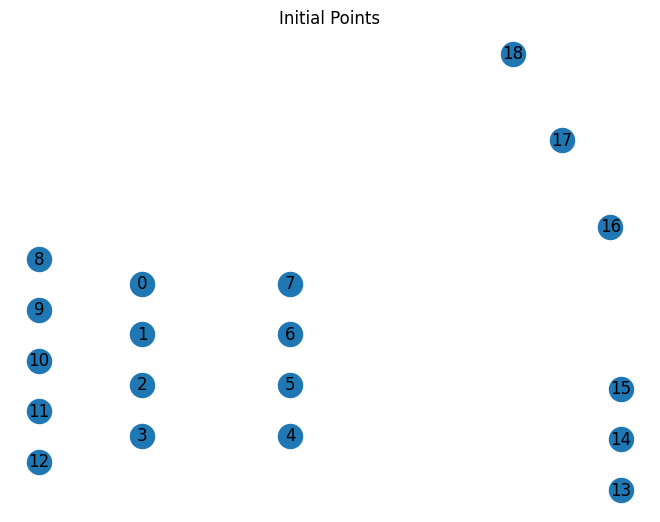

In [6]:
# importlib.reload(Graph2D)

# Add points the graph
g = Graph2D()
for i, p in enumerate(pts):
    g.add_point(pts[i,:])

g.plot(title='Initial Points')


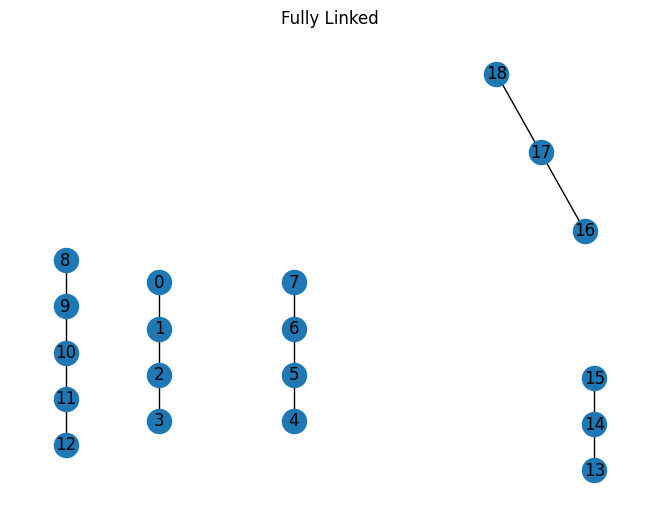

In [7]:
# Look for common pin pitch values: 0.05 in, 0.1 in, 0.2 in
# DIP row spacing type: 0.3 in.  0.6 in is alternate
# See: https://en.wikipedia.org/wiki/List_of_integrated_circuit_packaging_types

# Note: We're not creating shape objects here, just planning out the order to create them.
# We need to keep track of the index of the points to order them correctly.

# Create a KD Tree, then search for pairs on the common pitches, starting with the smallest.
pitches = Q([0.05, 0.1, 0.2], 'in').to('mm').magnitude

# Process list of points looking for any points within the current pitch radius.
for pitch in pitches:
    g.link_by_radius(pitch)

g.plot('Fully Linked')

In [8]:
for comp in nx.connected_components(g):
    print(comp)

{0, 1, 2, 3}
{4, 5, 6, 7}
{8, 9, 10, 11, 12}
{13, 14, 15}
{16, 17, 18}


In [9]:
g.link_components(np.array([0,0]))
# g.plot('Linked Components')

[[0, 3], [4, 7], [8, 12], [13, 15], [16, 18]]


TypeError: unhashable type: 'list'

In [ ]:
q = []
for component in nx.connected_components(g):

    # Get the end points
    end_points = [node for node in component if g.degree(node)==1]
    print(end_points)
    q.append(end_points)
q

[0, 3]
[4, 7]
[8, 12]
[13, 15]
[16, 18]


[[0, 3], [4, 7], [8, 12], [13, 15], [16, 18]]

In [ ]:
g.dist_from_point(np.array([0,0]),7)

29.37094184734293